#  Práctica 4 - Forward propagation

Elaborado por: Yurandir Santa María Santana Sandoval - Carné no. 18001546.

## Librerías

In [2]:
import numpy as np

import matplotlib.pyplot as plt

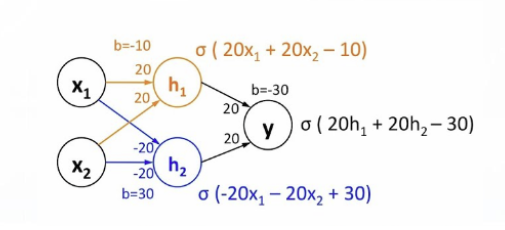

## Código

In [11]:
X = np.array([1, 0]).reshape(-1, 1)

X

array([[1],
       [0]])

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def addBias(x):
    return np.vstack((x, np.ones(x.shape[1])))

def heaviside(x):
    return (x >= 0).astype(np.float)

In [10]:
# Primera Capa

W1 = np.array([
    [20., 20., -10.],
    [-20., -20., 30.]
    ])

W1

array([[ 20.,  20., -10.],
       [-20., -20.,  30.]])

In [17]:
# Producto punto Primera Capa

Z = np.matmul(W1, addBias(X))

Z

array([[10.],
       [10.]])

In [19]:
# Su valor es cero para todos los valores negativos y uno para todos los valores positivos

H = heaviside(Z)

H

C:\Users\yuran\AppData\Local\Temp\ipykernel_23544\205909660.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (x >= 0).astype(np.float)


array([[1.],
       [1.]])

In [7]:
# Capa de salida

W2 = np.array([
    [20, 20, -30]
    ])

W2

array([[ 20,  20, -30]])

In [20]:
# Productos punto Capa de Salida

Z2 = np.matmul(W2, addBias(H))

Z2

array([[10.]])

In [21]:
# Su valor es cero para todos los valores negativos y uno para todos los valores positivos

H2 = heaviside(Z2)

H2

C:\Users\yuran\AppData\Local\Temp\ipykernel_23544\205909660.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (x >= 0).astype(np.float)


array([[1.]])

In [42]:
def forwardPropagation(x, activation=heaviside, retHidden=False):

    W1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
    W2 = np.array([[20, 20, -30]])

    Z = np.matmul(W1, addBias(X))
    
    H = activation(Z)

    Z2 = np.matmul(W2, addBias(H))
    
    y = activation(Z2)
    
    if retHidden:
        
        return y, H
    
    return y

In [43]:
# Conjunto de Valores de Entrada para compuerta XOR

X = np.array([[0,0], [0,1], [1,0], [1,1]])

X = X.T

X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [44]:
forwardPropagation(X)

C:\Users\yuran\AppData\Local\Temp\ipykernel_23544\205909660.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (x >= 0).astype(np.float)


array([[0., 1., 1., 0.]])

In [45]:
forwardPropagation(X, activation=sigmoid)

array([[4.54391049e-05, 9.99954520e-01, 9.99954520e-01, 4.54391049e-05]])

## Gráfica

In [55]:
_, h = forwardPropagation(X, retHidden=True)
h

C:\Users\yuran\AppData\Local\Temp\ipykernel_23544\205909660.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (x >= 0).astype(np.float)


array([[0., 1., 1., 1.],
       [1., 1., 1., 0.]])

In [56]:
def Grafica(x1, x2, y):
    
    f = np.abs(y-1) < 0.1
    
    nf = np.logical_not(f)

    color1=['green']
    color2=['crimson']
    
    plt.scatter(x1[f], x2[f], marker='P', label='1', s=150, c=color1)
    plt.scatter(x1[nf], x2[nf], marker='P', label='0', s=150, c=color2)
    
    plt.legend()

C:\Users\yuran\AppData\Local\Temp\ipykernel_23544\205909660.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (x >= 0).astype(np.float)


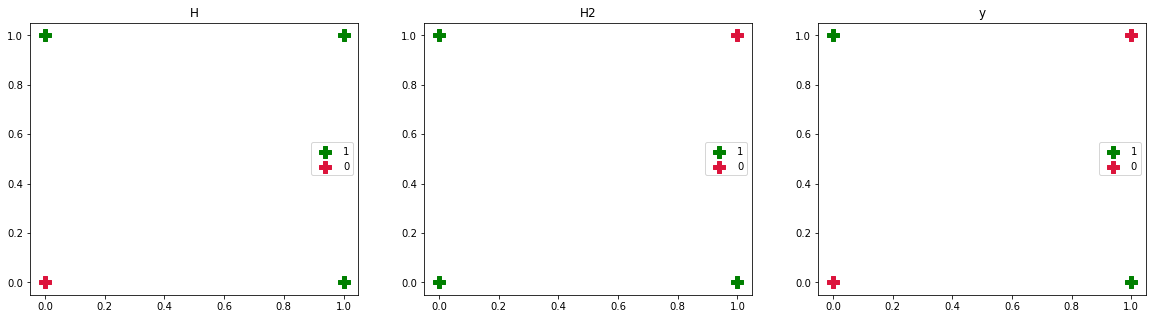

In [57]:
x1 = X[0, :]
x2 = X[1, :]

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
Grafica(x1, x2, h[0, :])

plt.title("H")
plt.subplot(1,3,2)
Grafica(x1, x2, h[1, :])

plt.title("H2")
plt.subplot(1,3,3)
Grafica(x1, x2, forwardPropagation(X).squeeze())

plt.title("y");

## Análisis y Conclusiones

A través de las gráficas se puede identificar que la combinación de la capa intermedia que actúa como compuerta AND y la capa de salida que actúa como compuerta OR permiten que la capa de salida conforme una función XOR.

El proceso para obtener estos resultados ha sido relativamente sencillo, sin embargo, no ha sido completamente similar al ejemplo visto en clase, por lo que algunas modificaciones y adaptaciones al código han sido realizadas dadas las características de la red neuronal estudiada. Ante esto también se puede concluir que es un código que debe ser cuidadosamente adaptado a otras redes neuronales.